### Importing Libraries

In [34]:
import pandas as pd
import os
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
%matplotlib inline

### Data Analysis and Preparation

In [38]:
data = pd.read_csv("Firwall_info_log2.csv")
data[data["Action"]=="reset-both"]

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
229,1024,21854,0,0,reset-both,157,157,0,1,0,1,0
1023,11317,61248,0,0,reset-both,143,143,0,1,0,1,0
2319,11317,53563,0,0,reset-both,143,143,0,1,0,1,0
2933,11337,25773,0,0,reset-both,159,159,0,1,0,1,0
5713,8116,25773,0,0,reset-both,157,157,0,1,0,1,0
8010,64461,31652,0,0,reset-both,62,62,0,1,0,1,0
8971,18517,31652,0,0,reset-both,62,62,0,1,0,1,0
9190,64014,3389,64014,3389,reset-both,293,223,70,4,0,3,1
10913,28305,25773,0,0,reset-both,148,148,0,1,0,1,0
13988,6889,8970,0,0,reset-both,143,143,0,1,0,1,0


In [22]:
data.isnull().sum()

Source Port             0
Destination Port        0
NAT Source Port         0
NAT Destination Port    0
Action                  0
Bytes                   0
Bytes Sent              0
Bytes Received          0
Packets                 0
Elapsed Time (sec)      0
pkts_sent               0
pkts_received           0
dtype: int64

In [29]:
data.describe()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,65532.000000,65532.000000,65532.000000,65532.000000,6.553200e+04,6.553200e+04,6.553200e+04,6.553200e+04,65532.000000,65532.000000,65532.000000
mean,49391.969343,10577.385812,19282.972761,2671.049930,9.712395e+04,2.238580e+04,7.473815e+04,1.028660e+02,65.833577,41.399530,61.466505
std,15255.712537,18466.027039,21970.689669,9739.162278,5.618439e+06,3.828139e+06,2.463208e+06,5.133002e+03,302.461762,3218.871288,2223.332271
min,0.000000,0.000000,0.000000,0.000000,6.000000e+01,6.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
25%,49183.000000,80.000000,0.000000,0.000000,6.600000e+01,6.600000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
50%,53776.500000,445.000000,8820.500000,53.000000,1.680000e+02,9.000000e+01,7.900000e+01,2.000000e+00,15.000000,1.000000,1.000000
75%,58638.000000,15000.000000,38366.250000,443.000000,7.522500e+02,2.100000e+02,4.490000e+02,6.000000e+00,30.000000,3.000000,2.000000
max,65534.000000,65535.000000,65535.000000,65535.000000,1.269359e+09,9.484772e+08,3.208818e+08,1.036116e+06,10824.000000,747520.000000,327208.000000


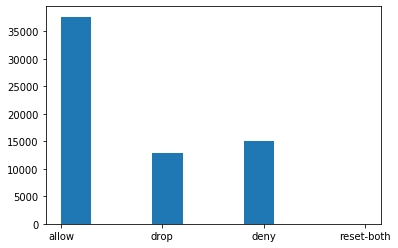

In [35]:
plt.hist(data["Action"])
plt.show()
print(f"Count of Reset Action {len(data[data['Action']==""])}")